In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales-data/sales_data_sample.csv


## To create a comprehensive workflow of the sales data which has been obtained from Kaggle...

- **Import all the required libraries**
- **Data Import**
- **Data inspection**
- **Data Cleaning and Transformation**
- **Exploratory Data Analysis (EDA)**
- **Data Visualization**

# 1. Data import

## Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# import our dataset
path = '/kaggle/input/sample-sales-data/sales_data_sample.csv'
sales_data = pd.read_csv(path,encoding='latin1')

sales_data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


## Initial Inspection and an overall understanding of the data

In [4]:
sales_data.shape

(2823, 25)

In [5]:
# find the name of the columns
sales_data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [6]:
# Info about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [7]:
sales_data['ORDERDATE']=pd.to_datetime(sales_data['ORDERDATE'])
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [8]:
# to change the datatype of any column

sales_data['COUNTRY']=sales_data['COUNTRY'].astype("string")
sales_data[['DEALSIZE','CONTACTFIRSTNAME',
            'CONTACTLASTNAME','TERRITORY','CUSTOMERNAME','CITY','STATE','PRODUCTLINE']]=sales_data[['DEALSIZE','CONTACTFIRSTNAME','CONTACTLASTNAME',
                                                'TERRITORY','CUSTOMERNAME','CITY',
                                                'STATE','PRODUCTLINE']].astype("string")
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   string        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   string        
 14  PHONE             2823 n

# Handling and checking missing values


In [9]:
sales_data.isnull()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2819,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2820,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2821,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [10]:
sales_data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [11]:
(1074
 /2823)*100

38.04463336875664

In [12]:
sales_data.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [13]:
sales_data["TERRITORY"].unique()

<StringArray>
[<NA>, 'EMEA', 'APAC', 'Japan']
Length: 4, dtype: string

In [14]:
sales_data.TERRITORY.unique()

<StringArray>
[<NA>, 'EMEA', 'APAC', 'Japan']
Length: 4, dtype: string

In [15]:
sales_data.loc[sales_data["TERRITORY"].isna()]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,<NA>,Yu,Kwai,Small
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,<NA>,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,<NA>,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,2003-10-28,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,<NA>,Hirano,Juri,Medium
8,10201,22,98.57,2,2168.54,2003-12-01,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,<NA>,Murphy,Julie,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,10248,23,65.52,9,1506.96,2004-05-07,Cancelled,2,5,2004,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,<NA>,Yu,Kwai,Small
2810,10261,29,50.78,7,1472.62,2004-06-17,Shipped,2,6,2004,...,43 rue St. Laurent,NaN,Montreal,Quebec,H1J 1C3,Canada,<NA>,Fresnisre,Jean,Small
2812,10283,33,51.32,12,1693.56,2004-08-20,Shipped,3,8,2004,...,23 Tsawassen Blvd.,NaN,Tsawassen,BC,T2F 8M4,Canada,<NA>,Lincoln,Elizabeth,Small
2817,10337,42,97.16,5,4080.72,2004-11-21,Shipped,4,11,2004,...,5905 Pompton St.,Suite 750,NYC,NY,10022,USA,<NA>,Hernandez,Maria,Medium


In [16]:
sales_data[(sales_data['TERRITORY']!="EMEA") & (sales_data['TERRITORY']!="APAC") & (sales_data['TERRITORY']!="Japan")]


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


In [ ]:
sales_data.loc[sales_data['TERRITORY'].isnull()]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,<NA>,Yu,Kwai,Small
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,<NA>,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,<NA>,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,2003-10-28,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,<NA>,Hirano,Juri,Medium
8,10201,22,98.57,2,2168.54,2003-12-01,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,<NA>,Murphy,Julie,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,10248,23,65.52,9,1506.96,2004-05-07,Cancelled,2,5,2004,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,<NA>,Yu,Kwai,Small
2810,10261,29,50.78,7,1472.62,2004-06-17,Shipped,2,6,2004,...,43 rue St. Laurent,NaN,Montreal,Quebec,H1J 1C3,Canada,<NA>,Fresnisre,Jean,Small
2812,10283,33,51.32,12,1693.56,2004-08-20,Shipped,3,8,2004,...,23 Tsawassen Blvd.,NaN,Tsawassen,BC,T2F 8M4,Canada,<NA>,Lincoln,Elizabeth,Small
2817,10337,42,97.16,5,4080.72,2004-11-21,Shipped,4,11,2004,...,5905 Pompton St.,Suite 750,NYC,NY,10022,USA,<NA>,Hernandez,Maria,Medium


In [18]:
sales_data2=sales_data.loc[sales_data["TERRITORY"].isna()]
sales_data2

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,<NA>,Yu,Kwai,Small
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,<NA>,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,<NA>,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,2003-10-28,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,<NA>,Hirano,Juri,Medium
8,10201,22,98.57,2,2168.54,2003-12-01,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,<NA>,Murphy,Julie,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,10248,23,65.52,9,1506.96,2004-05-07,Cancelled,2,5,2004,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,<NA>,Yu,Kwai,Small
2810,10261,29,50.78,7,1472.62,2004-06-17,Shipped,2,6,2004,...,43 rue St. Laurent,NaN,Montreal,Quebec,H1J 1C3,Canada,<NA>,Fresnisre,Jean,Small
2812,10283,33,51.32,12,1693.56,2004-08-20,Shipped,3,8,2004,...,23 Tsawassen Blvd.,NaN,Tsawassen,BC,T2F 8M4,Canada,<NA>,Lincoln,Elizabeth,Small
2817,10337,42,97.16,5,4080.72,2004-11-21,Shipped,4,11,2004,...,5905 Pompton St.,Suite 750,NYC,NY,10022,USA,<NA>,Hernandez,Maria,Medium


In [19]:
sales_data2['COUNTRY'].unique()

<StringArray>
['USA', 'Canada']
Length: 2, dtype: string

In [20]:
sales_data.COUNTRY.unique()

<StringArray>
[        'USA',      'France',      'Norway',   'Australia',     'Finland',
     'Austria',          'UK',       'Spain',      'Sweden',   'Singapore',
      'Canada',       'Japan',       'Italy',     'Denmark',     'Belgium',
 'Philippines',     'Germany', 'Switzerland',     'Ireland']
Length: 19, dtype: string

In [21]:
sales_data.loc[sales_data['COUNTRY']=='UK']

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
24,10403,24,100.00,7,2434.56,2005-04-08,Shipped,2,4,2005,...,Berkeley Gardens 12 Brewery,NaN,Liverpool,<NA>,WX1 6LT,UK,EMEA,Devon,Elizabeth,Small
104,10403,66,100.00,9,11886.60,2005-04-08,Shipped,2,4,2005,...,Berkeley Gardens 12 Brewery,NaN,Liverpool,<NA>,WX1 6LT,UK,EMEA,Devon,Elizabeth,Large
108,10129,33,100.00,2,4398.24,2003-06-12,Shipped,2,6,2003,...,35 King George,NaN,London,<NA>,WX3 6FW,UK,EMEA,Brown,Ann,Medium
113,10186,26,100.00,9,3854.24,2003-11-14,Shipped,4,11,2003,...,120 Hanover Sq.,NaN,London,<NA>,WA1 1DP,UK,EMEA,Hardy,Thomas,Medium
123,10316,33,100.00,17,4128.96,2004-11-01,Shipped,4,11,2004,...,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,10186,28,52.14,4,1459.92,2003-11-14,Shipped,4,11,2003,...,120 Hanover Sq.,NaN,London,<NA>,WA1 1DP,UK,EMEA,Hardy,Thomas,Small
2787,10316,34,43.70,12,1485.80,2004-11-01,Shipped,4,11,2004,...,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Small
2799,10129,32,64.97,8,2079.04,2003-06-12,Shipped,2,6,2003,...,35 King George,NaN,London,<NA>,WX3 6FW,UK,EMEA,Brown,Ann,Small
2808,10232,24,49.69,3,1192.56,2004-03-20,Shipped,1,3,2004,...,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Small


## Filling the NaN value to make the dataset complete

In [22]:
sales_data['TERRITORY']=sales_data['TERRITORY'].fillna('North America')

In [23]:
sales_data.isna().sum()


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY              0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [24]:
sales_data.TERRITORY.unique()

<StringArray>
['North America', 'EMEA', 'APAC', 'Japan']
Length: 4, dtype: string

find all instances where territory is null and assign to variable
 
null_t = sales_data.loc[sales_data['TERRITORY'].isnull()]
 
#find impacted countries from null list
 
null_t.COUNTRY.unique()

In [25]:
sales_data.loc[sales_data['TERRITORY']=='Japan']

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
30,10150,45,100.00,8,10993.50,2003-09-19,Shipped,3,9,2003,...,"Bronz Sok., Bronz Apt. 3/6 Tesvikiye",NaN,Singapore,<NA>,79903,Singapore,Japan,Natividad,Eric,Large
39,10258,32,100.00,6,7680.64,2004-06-15,Shipped,2,6,2004,...,2-2-8 Roppongi,NaN,Minato-ku,Tokyo,106-0032,Japan,Japan,Shimamura,Akiko,Large
63,10210,23,100.00,2,3009.09,2004-01-12,Shipped,1,1,2004,...,"Dojima Avanza 4F, 1-6-20 Dojima, Kita-ku",NaN,Osaka,Osaka,530-0003,Japan,Japan,Kentary,Mory,Medium
74,10339,40,68.92,4,2756.80,2004-11-23,Shipped,4,11,2004,...,2-2-8 Roppongi,NaN,Minato-ku,Tokyo,106-0032,Japan,Japan,Shimamura,Akiko,Small
89,10210,34,100.00,1,6123.40,2004-01-12,Shipped,1,1,2004,...,"Dojima Avanza 4F, 1-6-20 Dojima, Kita-ku",NaN,Osaka,Osaka,530-0003,Japan,Japan,Kentary,Mory,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,10198,40,63.67,2,2546.80,2003-11-27,Shipped,4,11,2003,...,15 McCallum Street - NatWest Center #13-03,NaN,Makati City,<NA>,1227 MM,Philippines,Japan,Cruz,Arnold,Small
2751,10210,42,70.33,15,2953.86,2004-01-12,Shipped,1,1,2004,...,"Dojima Avanza 4F, 1-6-20 Dojima, Kita-ku",NaN,Osaka,Osaka,530-0003,Japan,Japan,Kentary,Mory,Small
2762,10339,50,57.86,8,2893.00,2004-11-23,Shipped,4,11,2004,...,2-2-8 Roppongi,NaN,Minato-ku,Tokyo,106-0032,Japan,Japan,Shimamura,Akiko,Small
2789,10339,27,76.31,6,2060.37,2004-11-23,Shipped,4,11,2004,...,2-2-8 Roppongi,NaN,Minato-ku,Tokyo,106-0032,Japan,Japan,Shimamura,Akiko,Small


In [26]:
sales_data3=sales_data.loc[sales_data['TERRITORY']=='Japan']
sales_data3.COUNTRY.unique()

<StringArray>
['Singapore', 'Japan', 'Philippines']
Length: 3, dtype: string

## Replacing japan in territory to APAC

In [27]:
sales_data['TERRITORY']=sales_data['TERRITORY'].replace('Japan','APAC')

In [28]:
sales_data['TERRITORY'].unique()

<StringArray>
['North America', 'EMEA', 'APAC']
Length: 3, dtype: string

In [29]:
df_cleaned=sales_data.drop(columns=['ADDRESSLINE2','POSTALCODE','STATE'])

In [30]:
df_cleaned.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [31]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   string        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   string        
 14  PHONE             2823 n

# ------------------------------------------------End of data cleaning--------------------


# ------------------------------------- **Data Analysis**--------------------------------------------

## **Descriptive Statistics:** Summary statistics for numerical columns.

In [32]:
# Display the summary statistics of the numerical columns
df_cleaned.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


## **Descriptive Statistics:** Summary statistics for categorical columns.

In [33]:
# Display the summary statistics of the categorical columns
df_cleaned.describe(include=['string','O'])

,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823,2823,2823,2823,2823,2823,2823,2823,2823,2823,2823,2823
unique,6,7,109,92,91,92,73,19,3,77,72,3
top,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,USA,EMEA,Freyre,Diego,Medium
freq,2617,967,52,259,259,259,304,1004,1407,259,259,1384


## 3. Exploratory Data Analysis (EDA)

Perform EDA to understand the dataset better:


- **Distribution Analysis:** Histograms, box plots.
- **Correlation Analysis:** Heatmap of correlations.

In [34]:
df_cleaned.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

## Data distribution

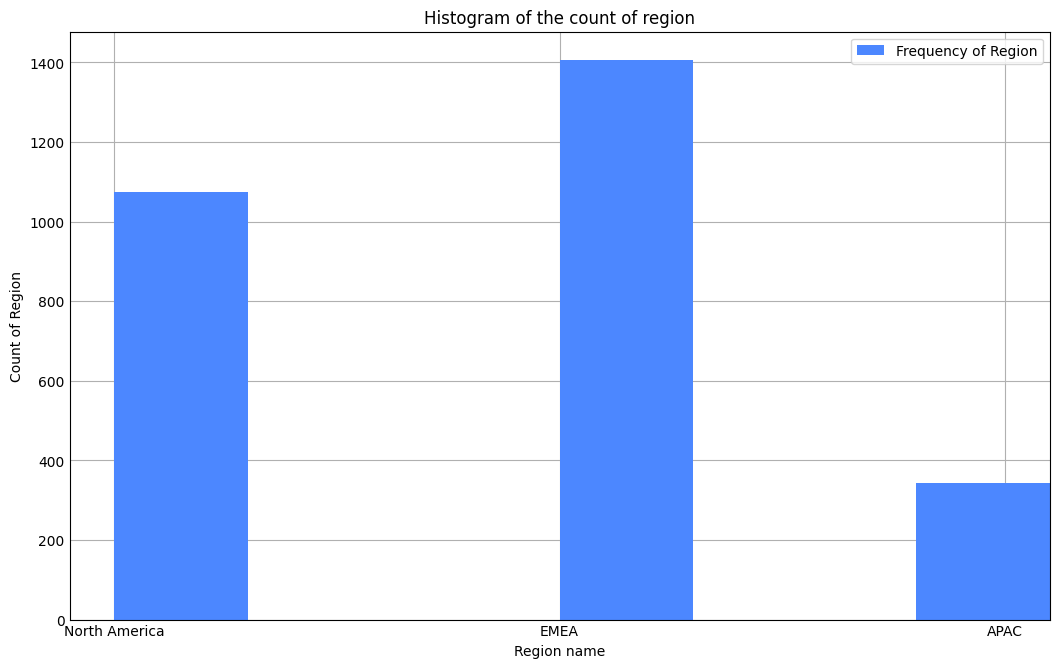

In [35]:
# Histogram
plt.style.use('_mpl-gallery')

# code to plot 
plt.figure(figsize=(10,6))
plt.hist(df_cleaned['TERRITORY'], color='#4c87ff',width = 0.3, label='Frequency of Region')
# title of the plot
plt.title("Histogram of the count of region")
# add labels to the axis
plt.xlabel("Region name")
plt.ylabel('Count of Region')
# grid
# legend
plt.legend()
plt.show()

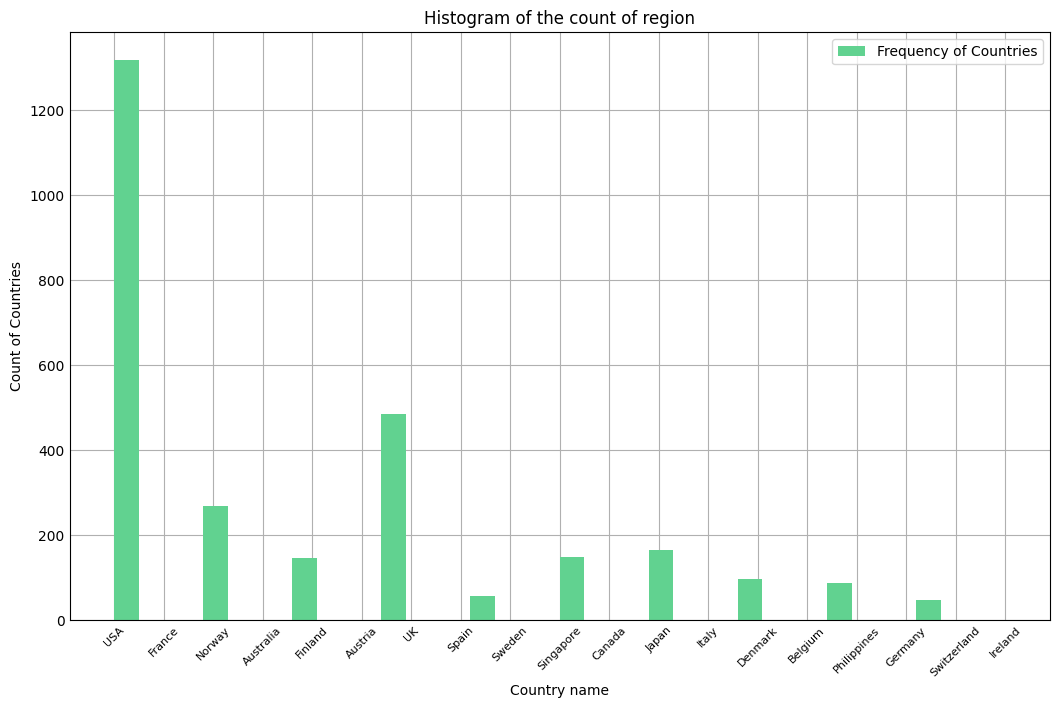

In [36]:
# Histogram
plt.style.use('_mpl-gallery')

# code to plot 
plt.figure(figsize=(10,6))
plt.hist(df_cleaned['COUNTRY'], color='#61d290',width = 0.5, label='Frequency of Countries')
# title of the plot
plt.title("Histogram of the count of region")
# add labels to the axis
plt.xlabel("Country name")
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('Count of Countries')
# grid
# legend
plt.legend()
plt.show()

<Axes: >

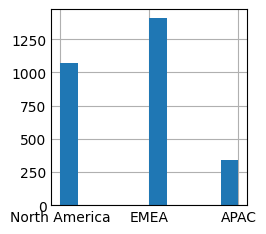

In [37]:
# distribution analysis
# Histogram

sales_data.TERRITORY.hist()


In [38]:
country_sorted=df_cleaned['COUNTRY'].value_counts().sort_values(ascending=False).reset_index()
country_sorted

,COUNTRY,count
0,USA,1004
1,Spain,342
2,France,314
3,Australia,185
4,UK,144
5,Italy,113
6,Finland,92
7,Norway,85
8,Singapore,79
9,Canada,70


In [39]:
country_sorted.rename(columns={'count': 'Values'}, inplace=True)
country_sorted

,COUNTRY,Values
0,USA,1004
1,Spain,342
2,France,314
3,Australia,185
4,UK,144
5,Italy,113
6,Finland,92
7,Norway,85
8,Singapore,79
9,Canada,70


In [40]:
country_sorted.columns

Index(['COUNTRY', 'Values'], dtype='object')

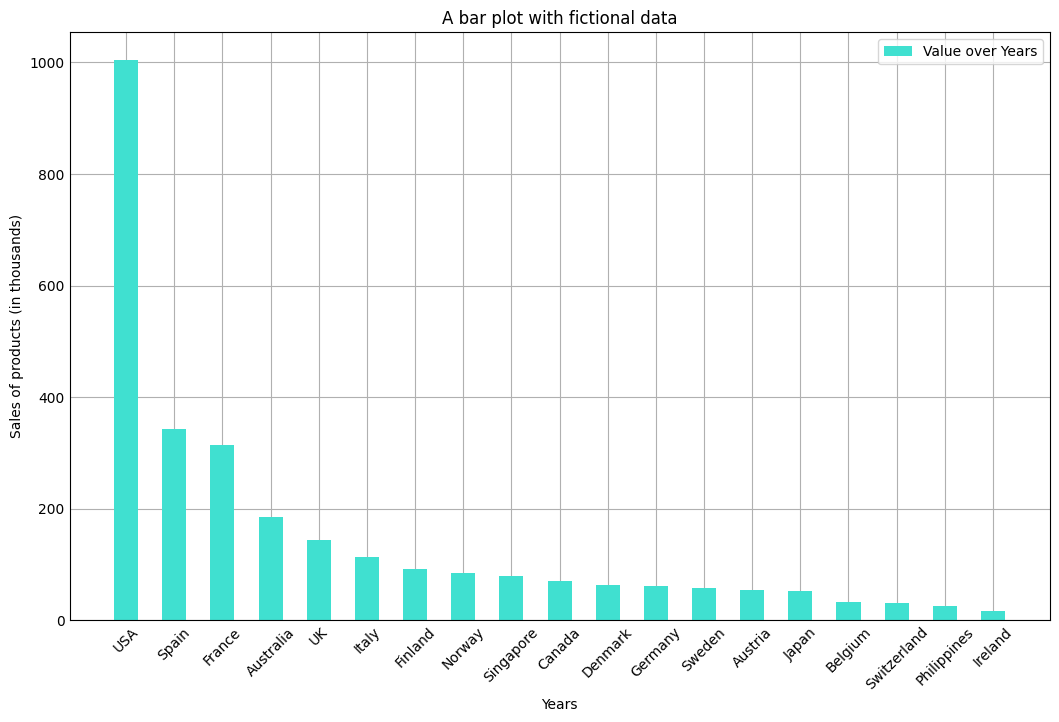

In [41]:
plt.style.use('_mpl-gallery')

# code to plot 
plt.figure(figsize=(10,6))
plt.bar('COUNTRY','Values', color='#40e0d0',width = 0.5, label='Value over Years', data=country_sorted)
# title of the plot
plt.title("A bar plot with fictional data")
# add labels to the axis
plt.xlabel("Years")
plt.xticks(rotation=45)
plt.ylabel('Sales of products (in thousands)')
# grid
# legend
plt.legend()
plt.show()

In [42]:
sales_data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,North America,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,<NA>,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,<NA>,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,North America,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,North America,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,<NA>,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,<NA>,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,<NA>,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,<NA>,31000,France,EMEA,Roulet,Annette,Small


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


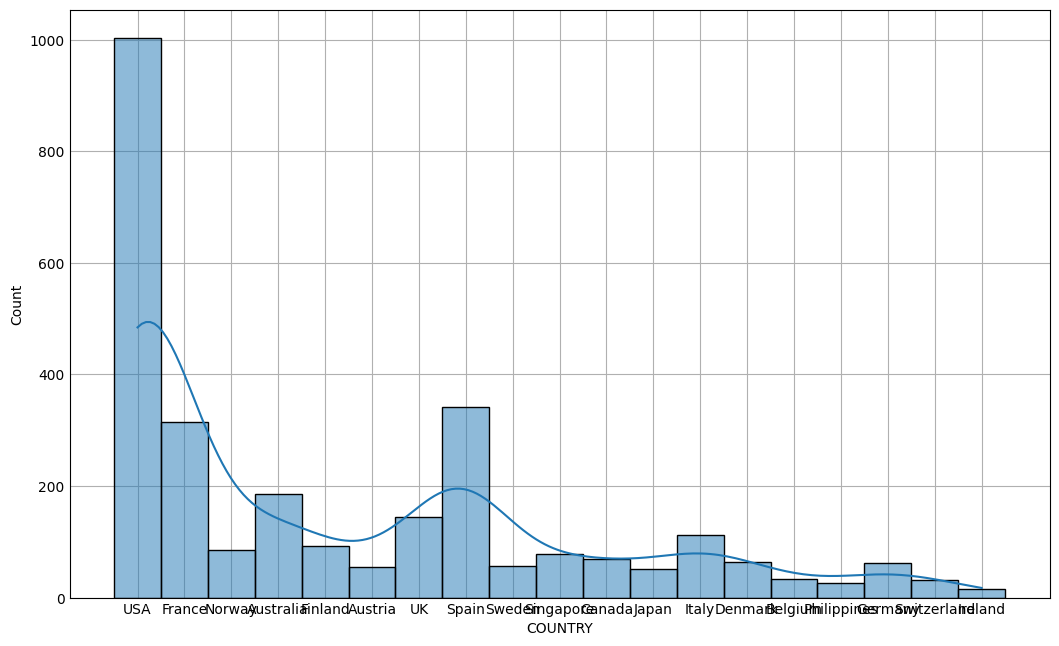

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_cleaned, x="COUNTRY",kde=True)
plt.show()

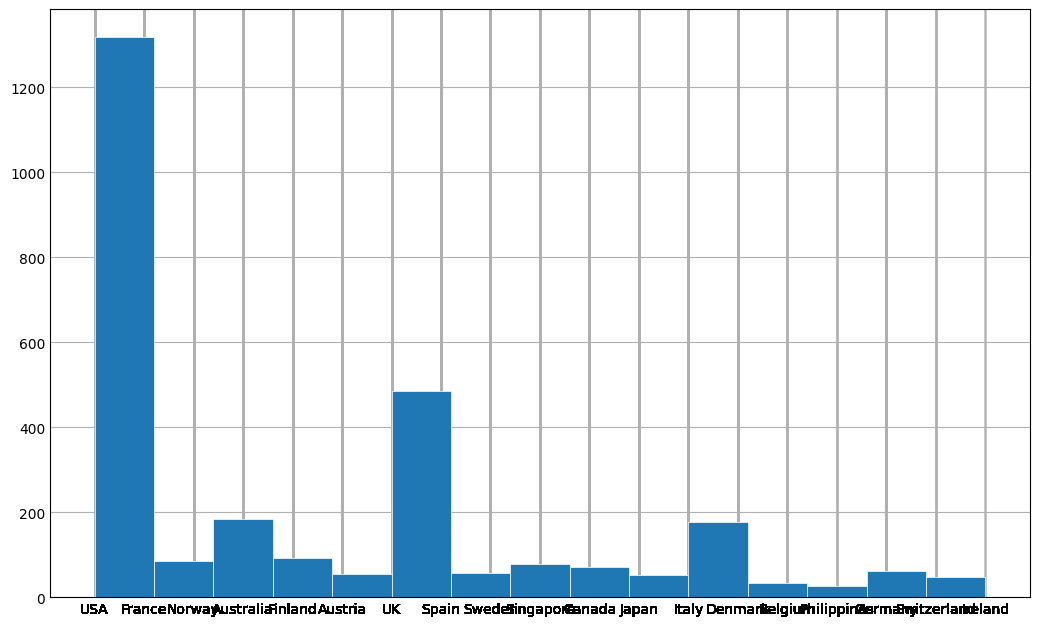

In [44]:
plt.style.use('_mpl-gallery')

# plot:

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(df_cleaned['COUNTRY'], bins=15, linewidth=0.5, edgecolor="white")
ax.set(xticks=sales_data['COUNTRY'])

plt.show()

/tmp/ipykernel_33/4294353354.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=sales_data, x='COUNTRY', stat='count', discrete=True,kde=True, ax=ax, palette='viridis')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


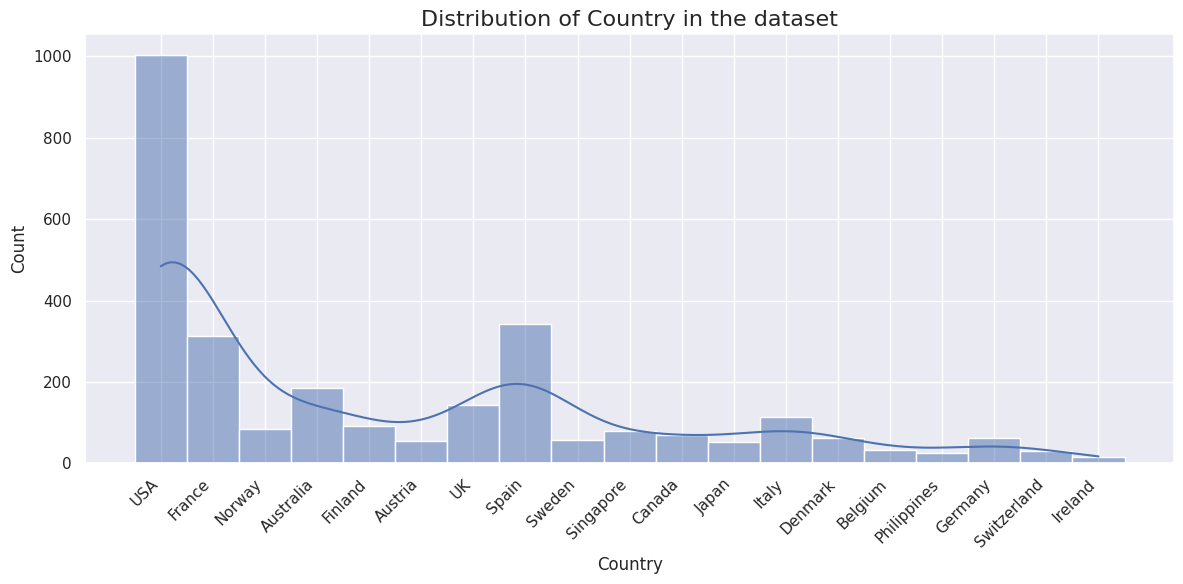

In [45]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.histplot(data=sales_data, x='COUNTRY', stat='count', discrete=True,kde=True, ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Distribution of Country in the dataset', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


In [46]:
sorted_sales=df_cleaned.sort_values(by='SALES', ascending=True)
sorted_sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2249,10425,11,43.83,6,482.13,2005-05-31,In Process,2,5,2005,...,S32_2509,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,France,EMEA,Labrune,Janine,Small
1287,10407,6,90.19,3,541.14,2005-04-22,On Hold,2,4,2005,...,S18_4409,The Sharp Gifts Warehouse,4085553659,3086 Ingle Ln.,San Jose,USA,North America,Frick,Sue,Small
2044,10408,15,36.93,1,553.95,2005-04-22,Shipped,2,4,2005,...,S24_3969,"Tokyo Collectables, Ltd",+81 3 3584 0555,2-2-8 Roppongi,Minato-ku,Japan,APAC,Shimamura,Akiko,Small
1551,10280,20,28.88,12,577.60,2004-08-17,Shipped,3,8,2004,...,S24_1937,Amica Models & Co.,011-4988555,Via Monte Bianco 34,Torino,Italy,EMEA,Accorti,Paolo,Small
1818,10419,15,42.67,7,640.05,2005-05-17,Shipped,2,5,2005,...,S24_2972,Salzburg Collectables,6562-9555,Geislweg 14,Salzburg,Austria,EMEA,Pipps,Georg,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,10403,66,100.00,9,11886.60,2005-04-08,Shipped,2,4,2005,...,S10_4698,"UK Collectables, Ltd.",(171) 555-2282,Berkeley Gardens 12 Brewery,Liverpool,UK,EMEA,Devon,Elizabeth,Large
1062,10412,60,100.00,9,11887.80,2005-05-03,Shipped,2,5,2005,...,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Spain,EMEA,Freyre,Diego,Large
53,10424,50,100.00,6,12001.00,2005-05-31,In Process,2,5,2005,...,S10_1949,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Spain,EMEA,Freyre,Diego,Large
744,10322,50,100.00,6,12536.50,2004-11-04,Shipped,4,11,2004,...,S18_2325,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,USA,North America,Young,Valarie,Large


In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm', hue='Species',palette='deep')
#scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, 
#hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend="auto", ax=None, **kwargs)
# title of the plot
plt.title("A seaborn scatterplot with average Sepal Length per species",fontsize=16,color='#61d290')
# add labels to the axis
plt.xlabel("SepalLengthCm",fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.ylabel('SepalWidthCm',fontsize=12)
plt.yticks(fontsize=12)
# grid
# legend
plt.legend()
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
df_cleaned.to_csv('sales_data_for viz.csv')

In [ ]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.scatterplot(data=df_cleaned, x='COUNTRY', y='QUANTITYORDERED', ax=ax, palette='viridis',hue='TERRITORY',size='SALES')

# Customize the plot
ax.set_title('Sales by country', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.histplot(data=sales_data, x='TERRITORY', stat='count', discrete=True,kde=True, ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Distribution of regions in the dataset', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


# Analysis of the dataset

- What are the total sales over the past year?
- Which product has the highest sales?
- What is the average order value?
- How many unique customers made purchases?
- What is the sales trend over the past year?


In [ ]:
# What are the total sales over the past year?

df_cleaned.YEAR_ID.unique()

In [ ]:
#df_cleaned.groupby()

In [ ]:
# Group by columns 'A' and 'B' and aggregate
agg_df = df.groupby(['A', 'B']).agg({
    'C': ['sum', 'mean', 'std']
})
print(agg_df)


In [ ]:
sales_2005=sales_data.loc[sales_data['YEAR_ID']==2005]

In [ ]:

group_2005=sales_2005.groupby('TERRITORY').agg({'SALES':['sum','max','min']}).reset_index()
group_2005.columns



In [ ]:
group_2005_sales=sales_2005.groupby('TERRITORY').agg({'SALES':'sum'}).reset_index()
group_2005_sales

In [ ]:
group_2005_sales.columns

In [ ]:
plt.style.use('_mpl-gallery')

# code to plot 
plt.figure(figsize=(10,6))
plt.bar('TERRITORY','SALES', color='#40e0d0',width = 0.5, label='Sales across regions', data=group_2005_sales)
# title of the plot
plt.title("Regional sales in 2005")
# add labels to the axis
plt.xlabel("Region")
plt.xticks()
plt.ylabel('Sales Amount ($)')
# grid
# legend
plt.legend()
plt.show()

In [ ]:
group_2005_sales_1=sales_2005.groupby('COUNTRY').agg({'SALES':'sum'}).sort_values(by='SALES',ascending=False).reset_index()
group_2005_sales_1

In [ ]:
plt.style.use('_mpl-gallery')

# code to plot 
plt.figure(figsize=(10,6))
plt.bar('COUNTRY','SALES', color='#dbaaee',width = 0.5, label='Sales across countries', data=group_2005_sales_1)
# title of the plot
plt.title("Country-wise sales in 2005")
# add labels to the axis
plt.xlabel("Countries")
plt.xticks(rotation=45)
plt.ylabel('Sales Amount ($)')
# grid
# legend
plt.legend()
plt.show()

In [ ]:
total_sales = sales_2005['SALES'].sum()
total_sales

In [ ]:
sales_data.columns

In [ ]:
# Which product has the highest sales? -----> Classic Cars
sales_data.PRODUCTLINE.unique()

In [ ]:
product_sales = pd.DataFrame(sales_data.groupby('PRODUCTLINE')['SALES'].sum()).reset_index()
product_sales_sorted = product_sales.sort_values(by='SALES')

In [ ]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the barplot
sns.barplot(data=product_sales_sorted, x='PRODUCTLINE', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales by category', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
sales_data["SALES"].mean()

In [ ]:
sales_data.head(10)

In [ ]:
order_ID_sales = pd.DataFrame(sales_data.groupby('ORDERNUMBER')['SALES'].mean()).reset_index()
order_ID_sales

In [ ]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.lineplot(data=order_ID_sales.head(20), x='ORDERNUMBER', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales by order number', fontsize=16)
ax.set_xlabel('order number', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# count of unique customers

sales_data['CUSTOMERNAME'].nunique()

In [ ]:
sales_2004 = sales_data.loc[sales_data['YEAR_ID']==2004]
sales_2003 = sales_data.loc[sales_data['YEAR_ID']==2003]

In [ ]:
monthly_sales_2005 = pd.DataFrame(sales_2005.groupby('MONTH_ID')['SALES'].sum()).reset_index()
monthly_sales_2005

In [ ]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.barplot(data=monthly_sales_2005, x='MONTH_ID', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales by month id in 2005', fontsize=16)
ax.set_xlabel('month id', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
monthly_sales_2004 = pd.DataFrame(sales_2004.groupby('MONTH_ID')['SALES'].sum()).reset_index()
monthly_sales_2004

In [ ]:
monthly_sales_2003 = pd.DataFrame(sales_2003.groupby('MONTH_ID')['SALES'].sum()).reset_index()
monthly_sales_2003.sort_values(by='SALES')


In [ ]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.barplot(data=monthly_sales_2004, x='MONTH_ID', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales by month id in 2004', fontsize=16)
ax.set_xlabel('month id', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Region generated the most sales

region_sales_2004 = pd.DataFrame(sales_2004.groupby('TERRITORY')['SALES'].sum()).reset_index()
region_sales_2004.sort_values(by='SALES')

In [ ]:
# Region generated the most sales

region_sales_2003 = pd.DataFrame(sales_2003.groupby('TERRITORY')['SALES'].sum()).reset_index()
region_sales_2003.sort_values(by='SALES')

In [ ]:
# Region generated the most sales

region_sales_2005 = pd.DataFrame(sales_2005.groupby('TERRITORY')['SALES'].sum()).reset_index()
region_sales_2005.sort_values(by='SALES')

# Pivot tables in Pandas

> **Pivot tables is a powerful way to summarize and visualize data.** 

> **In Python, you can use the pandas library to create pivot tables, and then use visualization libraries like seaborn and matplotlib to plot the data.**

In [ ]:
pivot_yearly_sales = sales_data.pivot_table(
                    values='SALES',
                    index='TERRITORY',
                    columns = 'YEAR_ID',
                    aggfunc='sum')


In [ ]:
# Set of new columns
new_cols = ['Sales_2003','Sales_2004','Sales_2005']

# Assign new cols in the pivot table
pivot_yearly_sales.columns= new_cols



In [ ]:
pivot_yearly_sales_1 = pivot_yearly_sales.reset_index()
pivot_yearly_sales_1

In [ ]:
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the bar plot
sns.barplot(data=pivot_yearly_sales_1, x='TERRITORY', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales by month id in 2004', fontsize=16)
ax.set_xlabel('month id', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
pivot_yearly_sales.plot(kind='bar', figsize=(10,6))
plt.title('Sales of Product by Year')
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.legend(title='Territory vs Sales')
plt.xticks(rotation=0, ha='center')
plt.show()

In [ ]:
pivot_yearly_sales.plot(kind='line', figsize=(10,6))
plt.title('Sales of Product by Year')
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.legend(title='Territory vs Sales')
plt.xticks(rotation=0, ha='center')
plt.show()

In [ ]:
pivot_yearly_sales_2 = sales_data.pivot_table(
                    values='SALES',
                    index='TERRITORY',
                    columns = 'YEAR_ID',
                    aggfunc=['sum', 'mean', 'max', 'min'])
pivot_yearly_sales_2

In [ ]:
pivot_yearly_sales_2['mean'].plot(kind='bar', figsize=(10,6))
plt.title('Mean Sales of Product by Year')
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.legend(title='Territory vs Sales')
plt.xticks(rotation=0, ha='center')
plt.show()

In [ ]:
RegionRevenuePerYear = sales_data['TERRITORY'].unique()

temp=pd.DataFrame()
 
for i, territory in enumerate(RegionRevenuePerYear):

    territorydata = sales_data[sales_data['TERRITORY'] == territory]

    territorydata = territorydata.groupby('YEAR_ID')['SALES'].sum().reset_index()

    territorydata['TERRITORY'] = territory

    temp = pd.concat([temp,territorydata], ignore_index=True)

plt.figure(figsize=(20,10))

plt.title("Region Revenue by Year")

a= sns.barplot(x='TERRITORY',y='SALES',data=temp,hue='YEAR_ID')

plt.xticks()

plt.show()
 

- What are the peak sales months?
- Which region generates the most sales?
- What is the average sales per region?
- How do sales vary by product category?
- What is the customer retention rate?


- Which customer has made the most purchases?
- What is the average quantity ordered per product?
- How do sales compare between new and returning customers?
- What is the average order frequency per customer?
- Which sales channel is the most effective?
- What is the distribution of sales by payment method?
- How do sales vary by day of the week?
- What is the average delivery time?
- Which products have the highest return rates?
- What is the correlation between sales and discounts?


- How do sales vary by customer demographic?
- What is the lifetime value of a customer?
- Which marketing campaigns are the most effective?
- What is the conversion rate from leads to sales?
- How do sales vary by season?
- What is the average customer acquisition cost?
- Which products are frequently bought together?
- What is the impact of promotions on sales?
- How do sales vary by customer location?
- What is the average sales per sales representative?


- How do sales vary by product price range?
- What is the average sales per order?
- Which products have the highest profit margins?
- What is the average sales growth rate?
- How do sales vary by customer segment?
- What is the average time between repeat purchases?
- Which products have the highest stock turnover rate?
- What is the impact of customer reviews on sales?
- How do sales vary by product launch date?
- What is the average sales per marketing channel?


- Which products have the highest customer satisfaction?
- What is the impact of shipping costs on sales?
- How do sales vary by order size?
- What is the average sales per product category?
- Which regions have the highest customer loyalty?
- What is the impact of economic factors on sales?
- How do sales vary by customer age group?
- What is the average sales per website visit?
- Which products have the highest repeat purchase rate?
- What is the impact of product availability on sales?